In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../../data/FimaNfipClaims.csv')

In [7]:
print(df.shape)

(2570089, 40)


In [8]:
#some date analysis
print( df.dateOfLoss.min()) 
print( df.dateOfLoss.max()) 


1970-08-31T00:00:00.000Z
2022-04-14T00:00:00.000Z


In [15]:
df.head()

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2021-07-24T00:00:00.000Z,NaN,1.0,Temporarily Unavailable,N,1.0,24033.0,5.0,2007-01-01T00:00:00.000Z,...,0.0,7,0.0,MD,100000.0,40000.0,2007,20745.0,1.0,babe8abc-eae6-49f4-a5d6-b892b1087a45
1,0.0,2021-07-24T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,30009.0,NaN,2011-07-12T00:00:00.000Z,...,0.0,1,0.0,MT,150000.0,0.0,2011,59068.0,1.0,dbc2a6cc-192f-47ee-bd3c-e76bcc6a2350
2,0.0,2021-11-20T00:00:00.000Z,50.0,NaN,Temporarily Unavailable,N,1.0,48201.0,5.0,2001-06-09T00:00:00.000Z,...,1.0,1,0.0,TX,25000.0,25000.0,2001,77025.0,1.0,547d731b-b35f-4d60-a903-15cc8a4d12df
3,0.0,2021-11-20T00:00:00.000Z,9.0,NaN,Temporarily Unavailable,N,1.0,12103.0,5.0,1996-10-07T00:00:00.000Z,...,0.0,1,0.0,FL,150000.0,35000.0,1996,33702.0,1.0,18e7a2e8-5b52-4cdd-82a2-9112dbbc953b
4,0.0,2021-11-20T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,24029.0,NaN,2003-09-19T00:00:00.000Z,...,0.0,1,0.0,MD,75000.0,10000.0,2003,21620.0,0.0,40c5393a-03a4-41ed-8fb3-4b3de1e28534


In [9]:
df.dtypes

agricultureStructureIndicator                 float64
asOfDate                                       object
baseFloodElevation                            float64
basementEnclosureCrawlspace                   float64
reportedCity                                   object
condominiumIndicator                           object
policyCount                                   float64
countyCode                                    float64
communityRatingSystemDiscount                 float64
dateOfLoss                                     object
elevatedBuildingIndicator                     float64
elevationCertificateIndicator                 float64
elevationDifference                           float64
censusTract                                   float64
floodZone                                      object
houseWorship                                  float64
latitude                                      float64
longitude                                     float64
locationOfContents          

In [10]:
df[['latitude','longitude']]

,latitude,longitude
0,38.8,-77.0
1,45.2,-109.2
2,29.7,-95.4
3,27.9,-82.6
4,39.1,-76.1
...,...,...
2570084,35.6,-75.5
2570085,43.6,-84.3
2570086,35.3,-78.0
2570087,34.4,-77.6


In [11]:
#see which years have data: 
agg= df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'})
print(agg.head(10))
#crop to after 1975 
df = df.loc[df['yearOfLoss']>=1975]

            amountPaidOnBuildingClaim
yearOfLoss                           
1970                                0
1972                                0
1973                                3
1974                                4
1975                               20
1976                               36
1977                             3503
1978                            25352
1979                            61512
1980                            36459


Text(0.5, 1.0, 'claims amt')

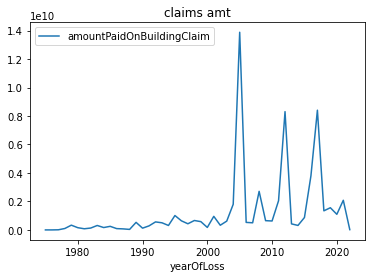

In [12]:
#amount paid by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'sum'}).plot()
plt.title('claims amt')

Text(0.5, 1.0, 'claims count')

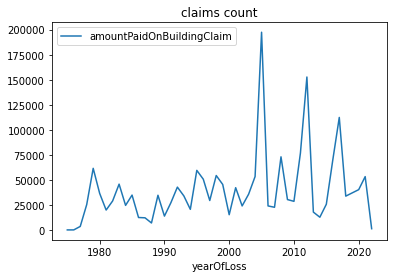

In [13]:
#number of claims by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'}).plot()
plt.title('claims count')

Text(0.5, 1.0, 'totale claim amt by state')

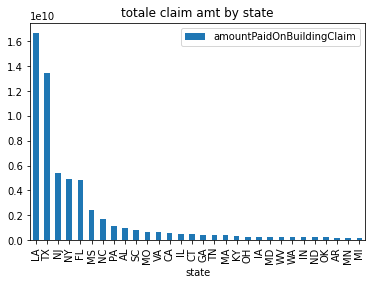

In [14]:
#number of claims by state 
agg= df.groupby('state').agg({'amountPaidOnBuildingClaim':'sum'})
agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(30).plot(kind='bar')
plt.title('totale claim amt by state')

In [21]:
#figure out which is paid which is coverage 
df[['totalBuildingInsuranceCoverage','amountPaidOnBuildingClaim']].head()

,totalBuildingInsuranceCoverage,amountPaidOnBuildingClaim
0,100000.0,NaN
1,150000.0,593.50
2,25000.0,NaN
3,150000.0,NaN
4,75000.0,31311.04
